
## Zip Codes Business Patterns: economic trends across geographies

<img src="https://larrylittlefield.files.wordpress.com/2017/08/retsmall2015new.png" width=800>

---

*we will identify spatio-temporal trends in the number of businesses per zip code in NYC over time using [zipcode business patterns (ZBP)](https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html) data.*

<br>


### **PART 1 - Loading and visualizing the data**

In [ ]:
# install the required geopandas package
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 12.0 MB/s eta 0:00:00


In [ ]:
# import all the required packages

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import geopandas as gpd

In [ ]:
# mount the google drive to access the data files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# hide the warnings, if any
import warnings
warnings.filterwarnings("ignore")

<b> Load the pre-cleaned NYC zipcode business patterns data into a pandas DataFrame. </b>

In [ ]:
# load the NYC zipcode business patterns data from the csv file present in drive
nyc_zipcode_bp_df = pd.read_csv("/content/drive/MyDrive/nyc_zbp_est_total_2000_2012_clean.csv")

In [ ]:
# observe the dataframe
nyc_zipcode_bp_df

,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,-73.996930,40.750213
1,10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,-73.985677,40.716152
2,10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,-73.988850,40.731947
3,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.012847,40.703472
4,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.040777,40.698767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.832606,40.607089
242,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.811580,40.587210
243,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.840021,40.630053
244,11694,288,301,302,302,303,317,315,332,328,317,330,326,326,-73.851767,40.575181


Note that this DataFrame has the zipcode, number of establishments in a given year from 2000 to 2012, and the latitude/longitude of the zip codes.


In [ ]:
# though it is a cleaned dataset, observe the dataframe for any NAN values
nyc_zipcode_bp_df.isna().sum()

zip           0
N_est_2000    0
N_est_2001    0
N_est_2002    0
N_est_2003    0
N_est_2004    0
N_est_2005    0
N_est_2006    0
N_est_2007    0
N_est_2008    0
N_est_2009    0
N_est_2010    0
N_est_2011    0
N_est_2012    0
longitude     0
latitude      0
dtype: int64

In [ ]:
# set the zipcode as the index of the dataframe for easy accessing the data,
# this is optional
nyc_zipcode_bp_df.set_index('zip', inplace=True)

""" remove columns that are insignificant for clustering,
 although the clustering using latitude/longitude help in clustering across
 the geographies easily, we are trying to cluster based on number of business
 establishments per year belonging to a zipcode. So latitudes and longitudes
 are not needed for now """

nyc_zipcode_bp_df = nyc_zipcode_bp_df.iloc[:, :-2]

In [ ]:
# observe the dataframe

# there are some zipcodes like 10004 present with same data except
# different latitudes and longitudes,
nyc_zipcode_bp_df.head()

,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012
zip,,,,,,,,,,,,,
10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235
10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954
10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214
10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442
10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442


<b> Creating a numpy array `years` for the values of the years between 2000 and 2012</b>

In [ ]:
# generate a numpy array with integers starting from 2000 to 2012, to use as x-axis
# ticks for plots
req_years = np.arange(2000, 2013, dtype=int)

print(req_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]


<b>Making a heat map of the raw NYC timeseries data

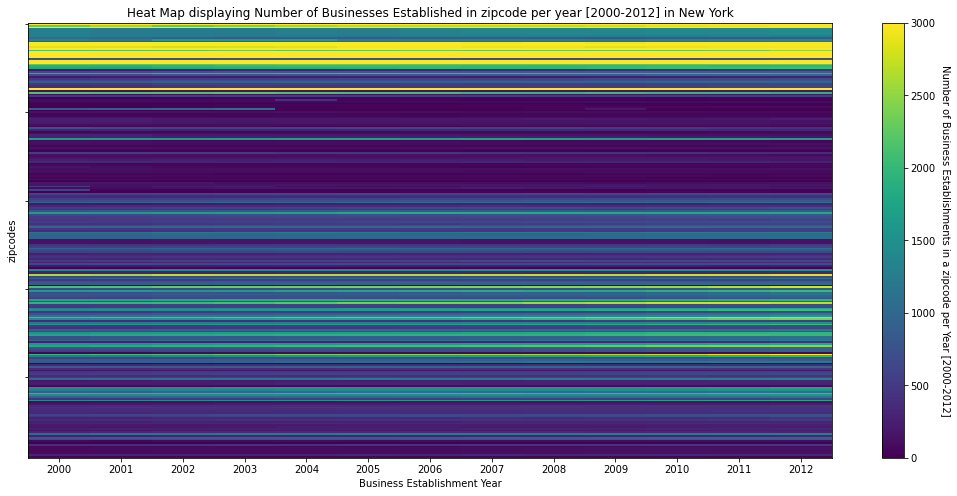

In [ ]:
# create a new figure and axis object, with length as 18 inches and width as 8 inches
fig, ax  = plt.subplots(figsize=(18, 8))

""" create a heat map using imshow with the below arguements
- an aspect equal to auto, to automatically determine the aspect ratio of the image
- interpolation is equal to nearest, to fill the gaps with nearest pixel values
- color limit(clim) is set to minimum of 0 and maximum of 3000 """

heatmap_img = ax.imshow(nyc_zipcode_bp_df, aspect="auto", interpolation="nearest",
               clim=(0, 3000))

# replace the default x axis ticks to denote years, by using years array
# current_x_ticks denote the present default ticks
x_ticks = np.arange(0,13)
ax.set_xticks(x_ticks)
# chage the current_x_ticks to years
ax.set_xticklabels(req_years[x_ticks])
# cannot display large number of zipcodes in y-axis, so keeping it as blank
ax.set_yticklabels("")

# set the x and y axis labels
ax.set_xlabel("Business Establishment Year")
ax.set_ylabel("zipcodes")
ax.set_title("Heat Map displaying Number of Businesses Established in zipcode" \
              " per year [2000-2012] in New York")

# Add colorbar
heatmap_colorbar = ax.figure.colorbar(heatmap_img)
heatmap_colorbar.ax.set_ylabel('Number of Business Establishments in a zipcode '\
                   'per Year [2000-2012]', rotation=-90, va="bottom")

fig.show()

<b> information we can glean from it </b>

Yes, the above heatmap is informative in some extent but unable to get much results from it. informative to some extent because, it is clearly visible without any blurring of image, good color contrast elucidated by a color bar, it doesnot contains any missing values as there are no white spaces, and the business establishments in a zip code in every year are interpretable with colors.


Overall, The Number of Business Establishments varied differently most of other zipcodes. There is no specific trend observed in all the zip codes, but for majority of zipcodes, the number of business establishments didn't change much over the time(there are not more zipcodes, which has minimum establishments in 2000 got huge business establishments by the year 2012 and viceversa). In some zipcodes, the business establishments number got reduced over the years and in few zipcodes, business establishments got increased over the years.

The zipcodes which doesn't have much establishments in the year 2000, remained the same till 2012. In contrast, in some zipcodes, the business establishments increased over the period of time.

There is no specific trend which is same for all the zipcodes is visible in the above heatmap.


<b> Standardizing the NYC values across features (time steps) and Generating a new heatmap with color limits -2 to 2. </b>

In [ ]:
""" standardize the newyork zipcodes dataset to make all the units in same units
since we have data showing business establishments over the years, we are
standardizing the data across features(row wise) """

nyc_zipcode_df_st = nyc_zipcode_bp_df.sub(nyc_zipcode_bp_df.mean(axis=1), axis=0).div(nyc_zipcode_bp_df.std(axis=1), axis=0)

In [ ]:
nyc_zipcode_df_st.head()

,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012
zip,,,,,,,,,,,,,
10001,0.155006,-0.825917,-1.183307,-1.616738,0.558020,0.116985,0.900202,1.919145,1.333633,0.063757,-0.422902,-0.529359,-0.468526
10002,-1.620916,-0.427828,-1.656798,-1.060254,-0.391946,0.195628,0.213569,0.209084,0.235995,0.612760,1.047833,1.227245,1.415628
10003,-1.051384,-1.422523,-1.358376,-0.955163,-0.625262,-0.208303,-0.015861,0.625614,0.726417,0.854712,0.918860,1.129630,1.381638
10004,-0.501573,-1.187168,-1.099646,-1.114233,-0.662032,-0.997536,-0.253592,0.607049,0.694572,0.738333,1.015489,1.103012,1.657323
10004,-0.501573,-1.187168,-1.099646,-1.114233,-0.662032,-0.997536,-0.253592,0.607049,0.694572,0.738333,1.015489,1.103012,1.657323


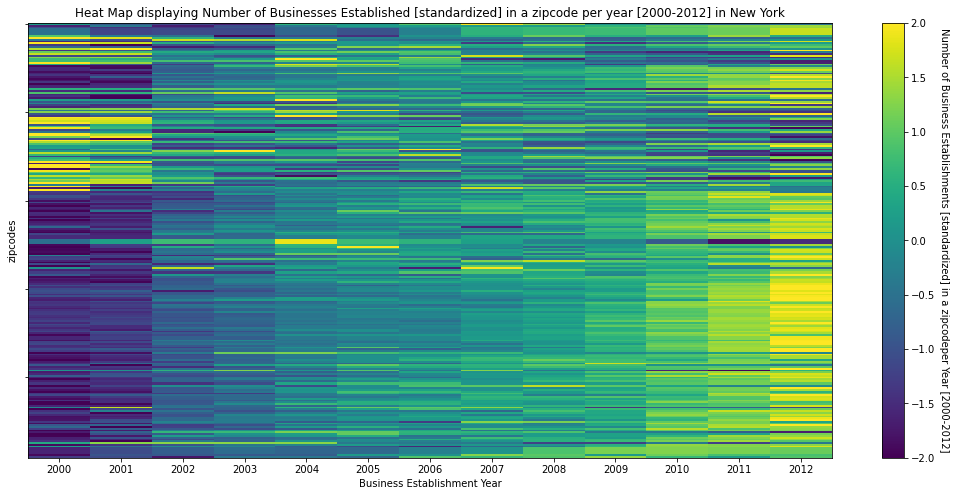

In [ ]:
# create a new figure and axis object, with length as 18 inches and width as 8 inches
fig, ax  = plt.subplots(figsize=(18, 8))

""" create a heat map using imshow with the below arguements
- an aspect equal to auto, to automatically determine the aspect ratio of the image
- interpolation is equal to nearest, to fill the gaps with nearest pixel values
- color limit(clim) is set to minimum of -2 and a maximum of 2 """

heatmap_img = ax.imshow(nyc_zipcode_df_st, aspect="auto", interpolation="nearest",
               clim=(-2, 2))

# replace the default x axis ticks to denote years, by using years array

# using x_ticks declared for above heatmap
ax.set_xticks(x_ticks)

# chage the current_x_ticks to years
ax.set_xticklabels(req_years[x_ticks])

# set the yticklabels to null, as we can't display all the zipcodes
ax.set_yticklabels("")

# set the x and y axis labels
ax.set_xlabel("Business Establishment Year")
ax.set_ylabel("zipcodes")
ax.set_title("Heat Map displaying Number of Businesses Established [standardized] in a zipcode" \
              " per year [2000-2012] in New York")

# Add colorbar
heatmap_colorbar = ax.figure.colorbar(heatmap_img)
heatmap_colorbar.ax.set_ylabel('Number of Business Establishments [standardized] in a zipcode'\
                   'per Year [2000-2012]', rotation=-90, va="bottom")

fig.show()

<b> The information we can glean from it </b>

yes, the new heatmap is more informative than the before as the standardized heatmap explains the hidden patterns in the data more clearly. There are trends visible that we are unable to figure out before standardizing.

In the current heatmap, we can see the color patterns more clearly how the number of establishments increased/decreased each year more clearly.

As the given dataset is cleaned properly, there is no issue of different units used, so there are not much changes in the heatmaps, but the standardized is more informative.

There are relatively more number of zipcodes, whose number of establishments increased from the year 2000 to 2012 this is not much clearly visible before standardizing, inversely there are some zip codes whose number of establishments reduced over the period of time from highest number of establishments to the lowest. The number of business establishments got too much increased and too much decreased for some zipcodes in the middle of the period, which was not visible in the heatmap with unstandardized data.

There is no single trend that is clearly visible in all the zipcodes, there are multiple trends visible like number of business establishments increasing over the period of time, decreasing over the period of time, got a sudden increase/decrease in the middle of the period.

The Trend that is visible a lot is that majority of the number of bussinness establishments in newyork got increased over the years from 2000 to 2012.

### **PART 2 - Clustering NYC data**

In [ ]:
# initialize the KMeans model with '4' clusters and a random state '2'
km = KMeans(n_clusters=4, random_state=2)
# fit the KMeans model with the new york zipcode business patterns dataframe
km.fit(nyc_zipcode_df_st)

KMeans(n_clusters=4, random_state=2)

In [ ]:
# verfying the labels and cluster centers
km.labels_

array([0, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 2, 3, 3, 2, 3, 3, 3,
       1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 0, 3,
       2, 2, 0, 2, 3, 3, 3, 2, 0, 1, 1, 3, 3, 2, 1, 3, 2, 2, 3, 3, 3, 0,
       1, 3, 1, 2, 2, 3, 3, 3, 3, 2, 2, 3, 1, 2, 1, 1, 2, 3, 1, 2, 1, 3,
       3, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)

In [ ]:
km.cluster_centers_

array([[-1.52771177, -1.57804239, -0.43883931,  0.02742194,  0.66391678,
         0.77291603,  0.49129711,  0.62945743,  0.38786011,  0.1486693 ,
         0.19557251,  0.09242015,  0.13506211],
       [ 1.87876119,  1.200715  , -0.23438844, -0.66826194, -0.6008716 ,
        -0.61486671, -0.52104607, -0.14229081, -0.1924106 , -0.14165514,
        -0.00552535, -0.03096953,  0.07280999],
       [-1.4022036 , -1.27109726, -0.83869888, -0.64527308, -0.35491696,
        -0.14079563, -0.03515945,  0.20435782,  0.36646296,  0.53843727,
         0.88928422,  1.16292058,  1.52668201],
       [ 0.80685617,  0.83282663,  0.52170251,  0.56873411,  0.83930278,
         0.4953694 ,  0.39888011, -0.222717  , -0.45162725, -0.6041025 ,
        -0.93922427, -1.16559178, -1.0804089 ]])

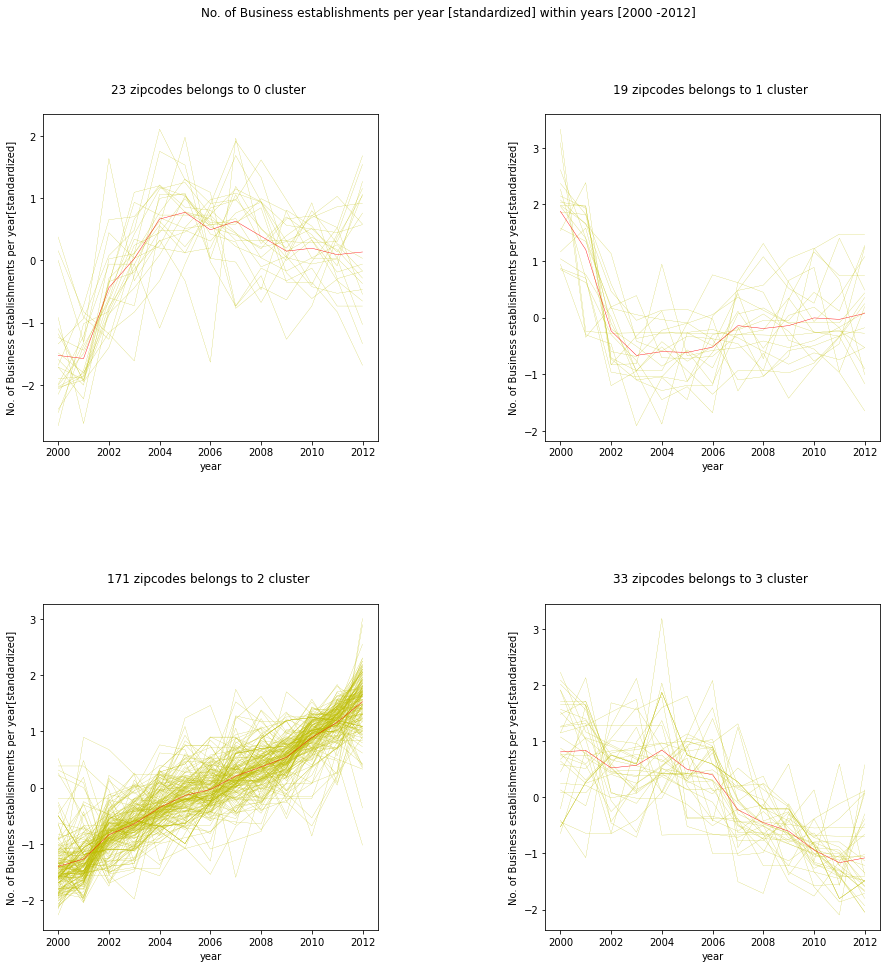

In [ ]:
# four panel plot

# initialize the four panel plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
each_cluster_num = 0

for row in ax:
    for col in row:
      # loop through each cluster to display the data
      # to get the True/False values showing the labels belonging to a cluster
      # True if a point belongs to the cluster_num else False
      ind = km.labels_ == each_cluster_num

      # get all the members of the cluster by taking the points which have labels as True
      mems = nyc_zipcode_df_st[ind]

      # plot the years from 2000 to 2012 on x-axis and cluster members on y axis
      #  with a line wwidth as 0.2 and color as yellow
      col.plot(req_years, mems.T, lw=0.2, color="y")

      # plot the years from 2000 to 2012 on x-axis and cluster centers on y axis
      #  with a line width as 0.4 and color as red
      col.plot(req_years, km.cluster_centers_[each_cluster_num], lw=0.4, color="r")

      col.set_xlabel("year")
      col.set_ylabel("No. of Business establishments per year[standardized]")

      col.set_title('{} zipcodes belongs to {} cluster \n'.format(len(mems),
                                                                  each_cluster_num))

      fig.subplots_adjust(hspace=0.5, wspace=0.5)
      # fig.show()

      # print the members of the cluster
      each_cluster_num += 1

fig.suptitle("No. of Business establishments per year [standardized] within years [2000 -2012]")
plt.show()

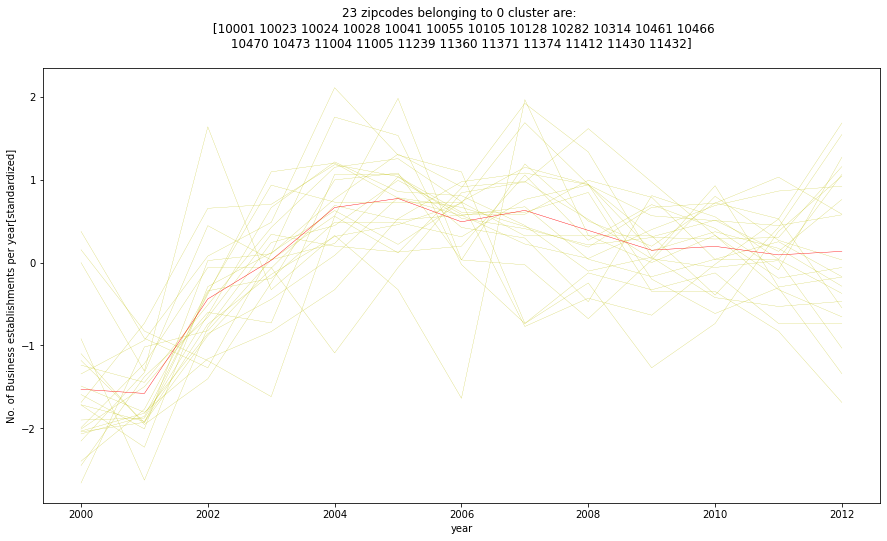

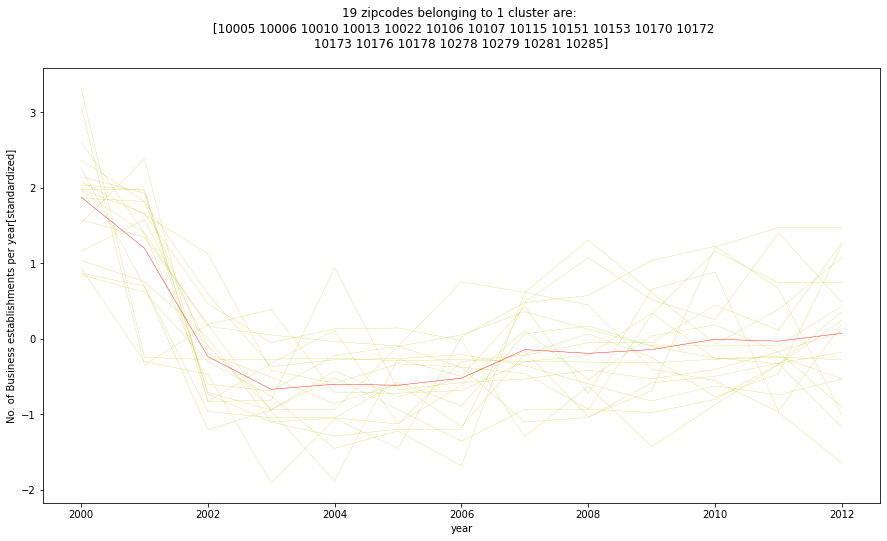

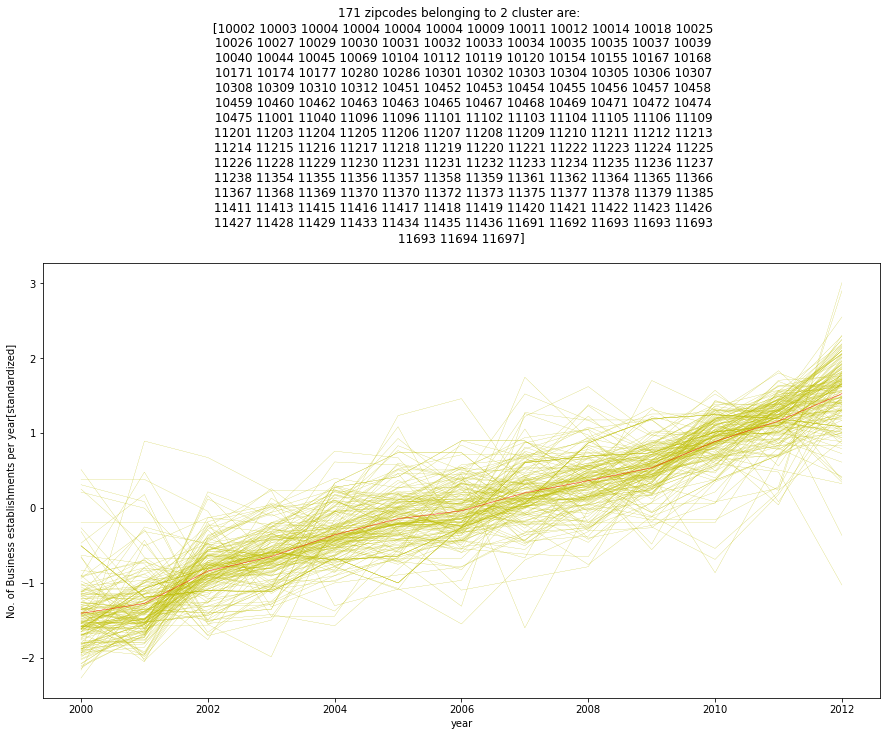

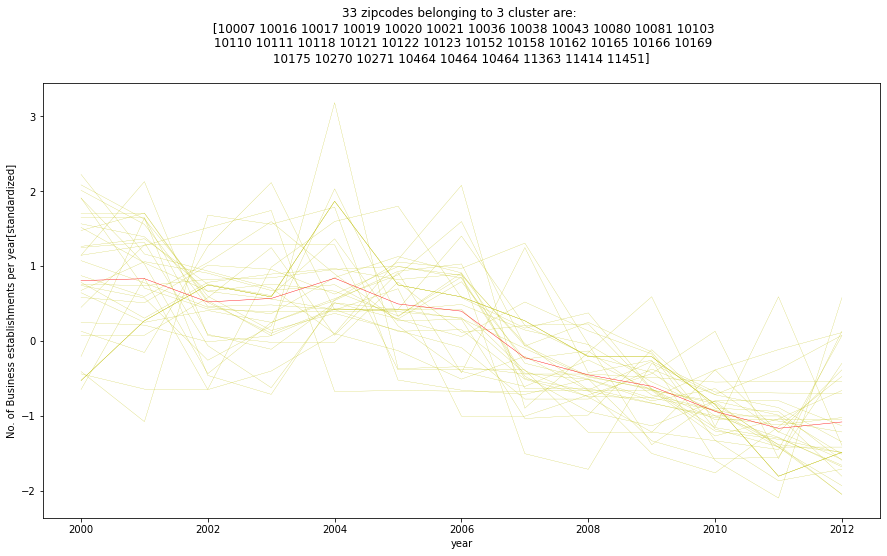

In [ ]:
# initialize the cluster numbers to 4
req_cluster_num = 4

# loop through each cluster to display the data
for each_cluster_num in range(req_cluster_num):
    # initialize the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # to get the True/False values showing the labels belonging to a cluster
    # True if a point belongs to the cluster_num else False
    ind = km.labels_ == each_cluster_num

    # get all the members of the cluster by taking the points which have labels as True
    mems = nyc_zipcode_df_st[ind]

    # plot the years from 2000 to 2012 on x-axis and cluster members on y axis
    #  with a line wwidth as 0.2 and color as yellow

    ax.plot(req_years, mems.T, lw=0.2, color="y")

    # plot the years from 2000 to 2012 on x-axis and cluster centers on y axis
    #  with a line wwidth as 0.2 and color as red
    ax.plot(req_years, km.cluster_centers_[each_cluster_num], lw=0.4, color="r")

    ax.set_xlabel("year")
    ax.set_ylabel("No. of Business establishments per year[standardized]")

    fig.show()

    cluster_members_zipcodes = nyc_zipcode_df_st.index[ind].values

    # print the members of the cluster
    ax.set_title('{} zipcodes belonging to {} cluster are: \n {} \n'.format(len(cluster_members_zipcodes), each_cluster_num, cluster_members_zipcodes))


In [ ]:
# add the cluster labels to new york zipcode businness patterns dataframe
nyc_zipcode_bp_df['cluster_labels'] = km.labels_.astype(str)

In [ ]:
# observe the data frame after adding the cluster_labels column
nyc_zipcode_bp_df.head(3)

,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,cluster_labels
zip,,,,,,,,,,,,,,
10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,0
10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,2
10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,2


In [ ]:
# load the nyc zipcodes shape file
nyc_zbp_shape_file_path = "/content/drive/MyDrive/nyc"
nyc_zipcode_shapes = gpd.read_file(nyc_zbp_shape_file_path)

In [ ]:
# set ZIPCODE as index to the nyc_zipcode_shapes dataframe for easy accessing
# the values, this is not mandatory
nyc_zipcode_shapes.set_index('ZIPCODE', inplace=True)

In [ ]:
# the new york zip code dataframe contains zipcodes as index, they are in 'int' format
nyc_zipcode_bp_df.index = nyc_zipcode_bp_df.index.astype(str)

In [ ]:
# both the nyc zbp data and nyc zbp shape file contains some rows with all the
# same values except the latitude and longitude values.
# so, after merging, the number of records will be duplicated. So, keeping
# only unique rows by dropping duplicates because of latitude and longitude values,
# by using drop_duplicates, if we didn't do this, there will be 8 records for zipcode 10004.

merged_nyc_zbp_df = nyc_zipcode_shapes.merge(nyc_zipcode_bp_df, left_index=True, \
                                     right_index=True).drop_duplicates()

# set the index name
merged_nyc_zbp_df.index.name = 'zipcode'

In [ ]:
merged_nyc_zbp_df.head(10)

,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,...,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,cluster_labels
zipcode,,,,,,,,,,,,,,,,,,,,,
10001,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,...,7370,7312,7415,7549,7472,7305,7241,7227,7235,0
10002,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,...,2551,2682,2686,2685,2691,2775,2872,2912,2954,2
10003,0,New York,55878.0,1.553838e+07,NY,New York,36,061,http://www.usps.com/,0.0,...,3776,3867,3909,4049,4071,4099,4113,4159,4214,2
10004,0,New York,2187.0,4.002521e+06,NY,New York,36,061,http://www.usps.com/,0.0,...,1283,1260,1311,1370,1376,1379,1398,1404,1442,2
10004,0,New York,2187.0,1.202708e+06,NY,New York,36,061,http://www.usps.com/,0.0,...,1283,1260,1311,1370,1376,1379,1398,1404,1442,2
10004,0,New York,2187.0,7.679616e+06,NY,New York,36,061,http://www.usps.com/,0.0,...,1283,1260,1311,1370,1376,1379,1398,1404,1442,2
10004,0,New York,2187.0,6.707080e+05,NY,New York,36,061,http://www.usps.com/,0.0,...,1283,1260,1311,1370,1376,1379,1398,1404,1442,2
10005,0,New York,8107.0,2.082901e+06,NY,New York,36,061,http://www.usps.com/,0.0,...,1226,1214,1259,1273,1291,1274,1266,1301,1273,1
10006,0,New York,3011.0,1.716641e+06,NY,New York,36,061,http://www.usps.com/,0.0,...,869,870,874,863,845,828,843,834,850,1


In [ ]:
merged_nyc_zbp_df.columns

Index(['BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY',
       'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'N_est_2000', 'N_est_2001', 'N_est_2002', 'N_est_2003', 'N_est_2004',
       'N_est_2005', 'N_est_2006', 'N_est_2007', 'N_est_2008', 'N_est_2009',
       'N_est_2010', 'N_est_2011', 'N_est_2012', 'cluster_labels'],
      dtype='object')

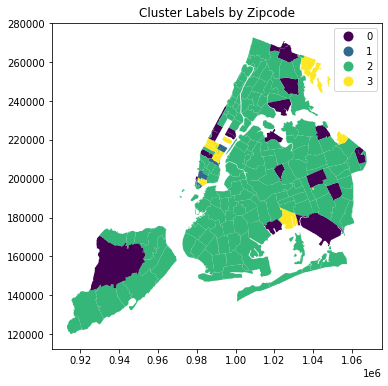

In [ ]:
# Create a choropleth map of the cluster labels
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_nyc_zbp_df.plot(column='cluster_labels', cmap='viridis', ax=ax, legend=True)
ax.set_title('Cluster Labels by Zipcode')

# give the labels for chloroplleth
plt.show()

***my understanding from the above choropleth plot.***

The above choropleth grouped the Newyork city into four groups, taking into account of the number of business establishments between the years 2000 to 2012, the groups are coloured by four colors yellow, blue, teal and purple.

Overall, the number of business establishments in this period (2000 - 2012) is uneven across areas. But in most of the places in Newyork, the number of business establishments increased overtime.

**cluster 0(purple color):**
the number of business didn't increase till 2001, then got increased till 2006 and then number of business establishments slowed down and became steady because this cluster contains areas with beaches, airports, parks, museums, and big malls. Because of high rent prices and limited space availability that restricted new businesses to enter.

**cluster 1 (blue color):**

The number of businesses saw a sudden decrease in Manhattan from the year 2000 and after the year 2003, the number of businesses became steady with a slight increase in 2007. The potential reason behind this pattern in manhattan is because of dotcom bubble in 2000, and the september 11, 2001 twin tower attacks in financial district manhattan. which resulted in not much increase in number of businesses compared to other areas.

**cluster 2 (teal color):**
There is a consistent incerase in the number of businesses, over the year from the starting of the period in 2000. This pattern is seen in majority of the places in New York.
The reasons are Government policies, increased businness oppurtunnities mostly in Technology, finance, manufacturing, and media, populated city with more number of talented people, developed infrastructure.

**cluster3 (yellow color):**

the number of business establishments decreased gradually over time. the reason may be, these areas contains beaches like Howard Beach, phelam bay, and little neck. so, in these places from the year 2000, with an increase in time, the number of business establishments started declining because of high rent prices and limited space availability that restricted new businesses to enter.

The New York City mostly experienced increasing number of businessess in all the places, but in some places because of the geographical reasons like airports, parks, malls, museums, and big malls, and above mentioned reasons, and the incidents happend like september 11 attcks, the increase in number of businesses are less.

The two possible reasons for the patterns visible in the plot are:
1. The number of businesses increasing consistently over time are in majority places of the city that is visible in teal color.
2. The number of business didn't increase till 2001, then got increased till 2006 and then number of business establishments slowed down and became steady because this cluster contains areas with beaches, airports, parks, museums, and big malls. Because of high rent prices and limited space availability that restricted new businesses to enter. This pattern i s visble in blue color.

### **PART 3 - Clustering the full US sample**

In [ ]:
# load the usa dataset
usa_zipcode_business_df = pd.read_csv('/content/drive/MyDrive/' \
                                      'all_zbp_est_total_2000_2012_clean.csv')

In [ ]:
# observe the dataframe
usa_zipcode_business_df

,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555
1,1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901
2,1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919
3,1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184
4,1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31599,99923,7,7,8,8,7,8,7,5,5,6,6,6,5,-130.040519,55.981117
31600,99925,26,24,21,22,20,19,23,23,22,25,19,20,24,-132.976265,55.557671
31601,99926,15,15,14,15,15,14,15,13,13,12,14,13,13,-131.490108,55.127000
31602,99927,2,3,3,2,2,3,1,3,2,2,2,3,3,-133.378427,56.250473


In [ ]:
# set the zipcode as the index of the dataframe for easy accessing
usa_zipcode_business_df.set_index('zip', inplace=True)

In [ ]:
# drop if the standardized time series values are less than 0
# iloc[:, :-2] is used to select columns excluding latitudes and longitudes

# we are doing this because standard deviation equals to zero means there is no
# change in data i.e all the values in that row are the same.
usa_zipcode_business_df = usa_zipcode_business_df.loc[usa_zipcode_business_df.iloc[:, :-2].std(axis=1) != 0]

In [ ]:
# observe before and after removing rows
usa_zipcode_business_df

,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
zip,,,,,,,,,,,,,,,
1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555
1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901
1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919
1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184
1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99923,7,7,8,8,7,8,7,5,5,6,6,6,5,-130.040519,55.981117
99925,26,24,21,22,20,19,23,23,22,25,19,20,24,-132.976265,55.557671
99926,15,15,14,15,15,14,15,13,13,12,14,13,13,-131.490108,55.127000


In [ ]:
# standardize the columns values in row wise fashion(across features)
usa_zipcode_business_st_df = usa_zipcode_business_df.iloc[:, :-2].\
                                      sub(usa_zipcode_business_df.iloc[:, :-2].\
                                      mean(axis=1), axis=0).div(usa_zipcode_business_df.\
                                                                iloc[:, :-2].std(axis=1),
                                                                axis=0)

In [ ]:
usa_zipcode_business_st_df

,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012
zip,,,,,,,,,,,,,
1001,0.418709,0.300378,0.300378,0.892033,0.694815,1.049807,1.049807,0.813145,-0.212389,-0.961818,-1.356254,-1.829577,-1.159036
1002,-1.261740,0.821132,-1.001381,0.734346,0.560773,0.994705,0.387201,1.602209,0.560773,-0.567449,-0.654235,-1.695671,-0.480663
1003,-1.046356,-1.046356,0.136481,0.727900,0.136481,-1.637774,-1.637774,0.727900,1.319318,0.727900,0.727900,0.727900,0.136481
1005,-1.561838,-0.788357,-0.014875,-0.208245,0.565237,-0.014875,0.758607,2.305571,0.565237,-1.368468,0.371866,-0.594986,-0.014875
1007,-0.927723,-0.079726,-1.587276,0.108718,0.297161,-0.362392,0.862492,1.333602,1.616267,0.108718,0.862492,-1.116167,-1.116167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99923,0.409673,0.409673,1.297299,1.297299,0.409673,1.297299,0.409673,-1.365577,-1.365577,-0.477952,-0.477952,-0.477952,-1.365577
99925,1.696297,0.814222,-0.508889,-0.067852,-0.949926,-1.390963,0.373185,0.373185,-0.067852,1.255259,-1.390963,-0.949926,0.814222
99926,1.037749,1.037749,0.074125,1.037749,1.037749,0.074125,1.037749,-0.889499,-0.889499,-1.853123,0.074125,-0.889499,-0.889499


In [ ]:
# fit a kmeans model on the usa standardized data with 2 clusters and a randm state of 2.
km = KMeans(n_clusters=2, random_state=2)
km.fit(usa_zipcode_business_st_df)

KMeans(n_clusters=2, random_state=2)

In [ ]:
km.labels_

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# add the cluster labels back to the usa zipcode[not standardized] dataframe
usa_zipcode_business_df['cluster_labels'] = km.labels_

In [ ]:
usa_zipcode_business_st_df

,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012
zip,,,,,,,,,,,,,
1001,0.418709,0.300378,0.300378,0.892033,0.694815,1.049807,1.049807,0.813145,-0.212389,-0.961818,-1.356254,-1.829577,-1.159036
1002,-1.261740,0.821132,-1.001381,0.734346,0.560773,0.994705,0.387201,1.602209,0.560773,-0.567449,-0.654235,-1.695671,-0.480663
1003,-1.046356,-1.046356,0.136481,0.727900,0.136481,-1.637774,-1.637774,0.727900,1.319318,0.727900,0.727900,0.727900,0.136481
1005,-1.561838,-0.788357,-0.014875,-0.208245,0.565237,-0.014875,0.758607,2.305571,0.565237,-1.368468,0.371866,-0.594986,-0.014875
1007,-0.927723,-0.079726,-1.587276,0.108718,0.297161,-0.362392,0.862492,1.333602,1.616267,0.108718,0.862492,-1.116167,-1.116167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99923,0.409673,0.409673,1.297299,1.297299,0.409673,1.297299,0.409673,-1.365577,-1.365577,-0.477952,-0.477952,-0.477952,-1.365577
99925,1.696297,0.814222,-0.508889,-0.067852,-0.949926,-1.390963,0.373185,0.373185,-0.067852,1.255259,-1.390963,-0.949926,0.814222
99926,1.037749,1.037749,0.074125,1.037749,1.037749,0.074125,1.037749,-0.889499,-0.889499,-1.853123,0.074125,-0.889499,-0.889499


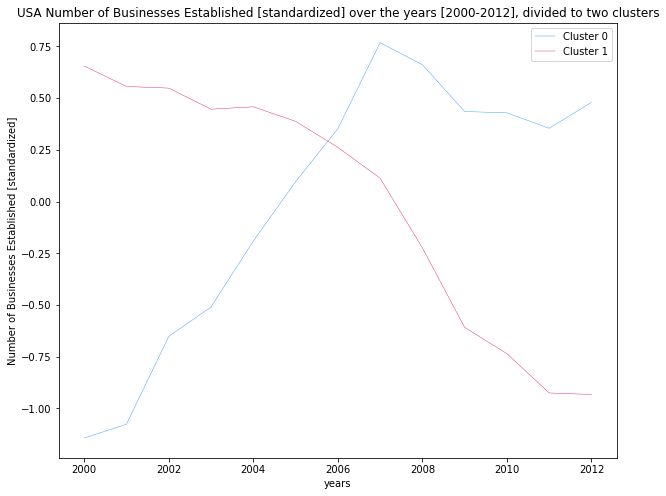

In [ ]:
# plot the centers

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,8))
# Plot cluster 0 in dodgerblue
ax.plot(req_years, km.cluster_centers_[0], color='dodgerblue',
         lw=0.4, label='Cluster 0')

# Plot cluster 1 in crimson
ax.plot(req_years, km.cluster_centers_[1], color='crimson', lw=0.4,
         label='Cluster 1')

# Set axis labels and title
ax.set_xlabel('years')
ax.set_ylabel("Number of Businesses Established [standardized]")
plt.title('USA Number of Businesses Established [standardized] over the years [2000-2012], divided to two clusters')

# Add legend
plt.legend()

plt.show()

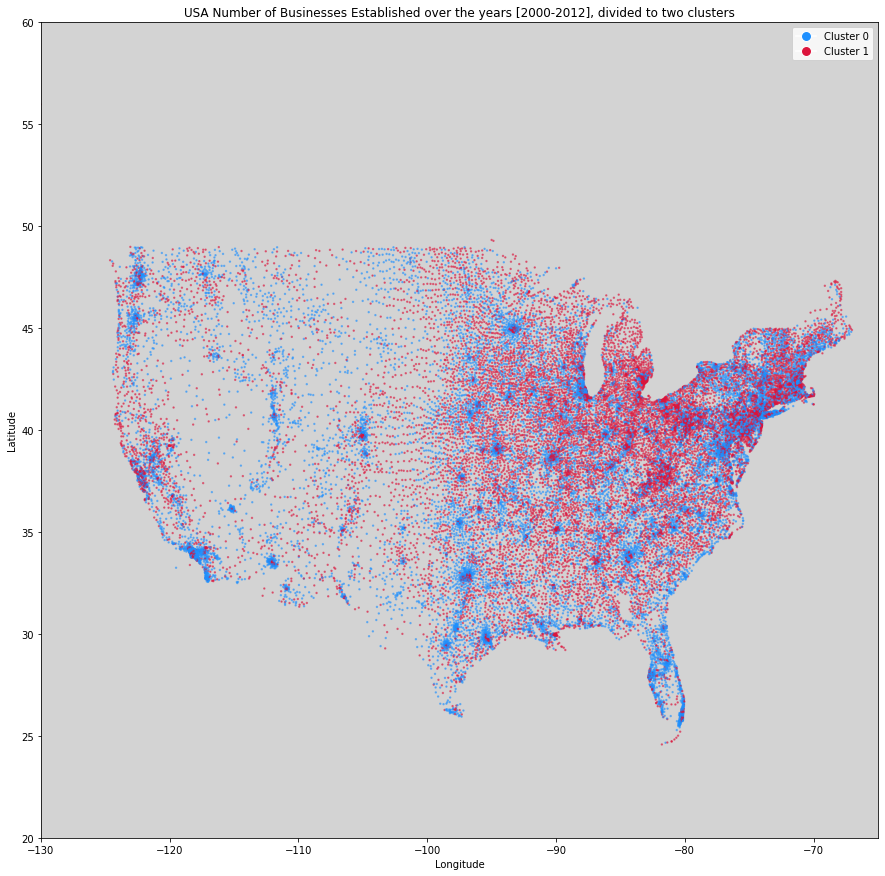

In [ ]:
# Make scatter plot for the two clusters

colors = ['dodgerblue', 'crimson']

# get the latitude and longitude values
us_zc_longitude_val = usa_zipcode_business_df['longitude']
us_zc_latitude_val = usa_zipcode_business_df['latitude']

# create a new figure object of size length and width as 15 inches
fig, ax = plt.subplots(figsize=(15,15))


# plot the longitude values on x axis and latitude values on y axis
scatter = ax.scatter(us_zc_longitude_val, us_zc_latitude_val,
            c=usa_zipcode_business_df['cluster_labels'].map({0: 'dodgerblue', 1: 'crimson'}),
            alpha=0.5, s=2)

# set the face color of the plot to lightgrey
ax.set_facecolor('lightgray')

plt.xlim(-130, -65)
plt.ylim(20, 60)

# create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster 0',
                              markerfacecolor='dodgerblue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Cluster 1',
                              markerfacecolor='crimson', markersize=10)]

# add the legend
ax.legend(handles=legend_elements, loc='upper right')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("USA Number of Businesses Established over the years [2000-2012], divided to two clusters")

plt.show()

Lot of businesses saw an increase in the years between 2000 and 2008. Because of dotcom boom, the more number of businesses increased in the technology, finance, and real estate sectors.The old businesses got digitalized, and the investments into the businesses got increased which led to the increase of more businesses in all over USA. However, this number reduced later because of the great recission in 2008.

In contrast to the above, there are businesses in some zipcodes, with a decreasing pattern since 2000.

The reasons varies differently in places like the Attack of Twin towers in Manhattan in 2001 has decreased its increase in number of businesses till 2012.

The dotcom bubble, which peaked in 2000 also made the number of businesses to decline and that trend continued in some parts of USA.

The areas which contains beaches like Howard Beach, phelam bay, and little neck, Airports, big malls, parks also saw a decrease in the number of business establishments because limited commercial space availability that restricted new businesses to enter, high rent prices, and existing business competition.


### **PART 4 - Context and Conclusions**


The zipcode business patterns contains the annual data about the total number of establishments, employment, and payroll for over 5-digit ZIP code areas nationwide, and the number of establishments by detailed industry in nine employment-size categories.

The Zipcode business patterns data is collected by US Census Bureau annually and is complemented by Annual Survey of Entrepreneurs (ASE).

The US Census Bureau  starts data collection with selecting a sample of businesses present in Census Bureau's Business Register(which is a database conatins data about businesses with one or more paid employees) and data from unemployement insurance programs and internal revenue service as well. Once the business are identified, survey forms are sent to collect data on their operations, including the number of employees, payroll, e.t.c. Once the data is collected the US Cencus Bureau checks for the data correctness and imputes missing data and tabulate and releases the data Anaully in the second quarter of the year.

The ZBP data is used by the government, private companies, Analysts, and researchers to analyze economic patterns in each area by zipcode, to investigate the factors that led businesses to increase/decrease in a zipcode, investment strategies, to find out business opportunities, study the changes in the businesses over time,  economic growth, and to make the decisions about planning and developing infrastructure.


The raw data used in this Assignment contained the information with a 5 digit zipcode followed by number of establishments in each year for a zipcode from the year 2000 to 2012. It also contains the latitude and longitude of the zipcodes. The shape file contains the data  about New York zipcode shapes. This data we can see in the above cells where we have observed the datasets initially after loading the csv file into a dataframe.

usually ZBP dataset also contains the data about businesses including employment, wages, Year established, and Sales.

The ZBP data is useful for researchers to find trends in the economy, identify areas of growth or decline, and track the performance of different industries which can inform planning decisions and help attract new businesses to the region. ZBP data can be used by entrepreneurs and small business owners to identify potential markets and competition. The data can also help inform business strategies, such as identifying areas with high demand for certain products or services. It is used by researchers like policy makers to make investments to support the places where the number of businesses are declining. It is used to evaluate the economic strength of a place by analyzing the type of companies located, their financial situation, number of employees. The Government uses this data for developing Infrastructure, develop the under developed areas by analyzing the businesses, employment levels, and payroll in a particular ZIP code, and use this information to identify factors that may be contributing to these trends. This data is also used to forecast the development of businesses and compare it with other areas across geographies.

By Analyzing the results of our new york zipcodes business patterns data results, where we have clustered the data into four clusters, we have clearly seen how the number of business establishments occurred in various places of newyork over the years. The Analysts, researchers can glean the info like what areas have got more number of businesses, is there any scope for the new businesses to enter in those regions, what are the factors that made to increase the number of businesses in those regions, vice versa, why the businessess in other areas decreased because of some issues like domcom bubble, greatest recission, september 11 attacks how these issues affected the businesses in the future. This will be used as a reference. How the businesses increase will be affected in the future if a new Airport or big shopping mall is built in an area. All of this Analysis we can glean from our Analysis above.


limitations includes the US Census Bureau collects ZBP data only from businesses with more than one paid employee, then ZBP doesn't data containing small businesses operated by families, freelancers, self employed people. which are also considered as businesses. In addition to this, it also contains details about only general things like number of paid employees, industry and location. If some more detailed data is being collected then it will be more beneficial to analyze businesses from grass root level and understand the businesses which are being grown more, which are being reduced overtime, why there are certain type of businesses in a particular area, e.t.c.
In our model Analysis, we have Analyzed the number of businesses increased or decreased, but we are quite un familiar about the prevailing reasons as we have no data provided about the businesses. Eventhough the data is cleaned by US census bureau, there are still some minor inaccuracies because of which, we have removed rows from data with standard deviation less than 0

By the results of our model as we have seen, the data is also not collected from all the zipcodes properly. we can say that the number of business increased in majority of areas in both newyork and USA
the reasons are Government policies, increased businness oppurtunnities mostly in Technology, finance, manufacturing, and media, and developed infrastructure facilities.

This should include a qualitative description of your models and results that would be understandable but informative for a policy maker who is looking to use these in the context of decision making.


https://www.census.gov/about.html

https://www.census.gov/programs-surveys/ase/about.html

https://atcoordinates.info/2020/01/31/county-and-zip-code-business-patterns-2017-and-the-census-api/

https://assets.nhgis.org/original-data/county-business-patterns/ZipCBP1995.pdf

https://www.census.gov/programs-surveys/cbp/data.html

https://www.caliper.com/learning/articles/what-are-zip-code-business-patterns/

---

<b> Use the "elbow method" to determine an appropriate value for k for NYC.

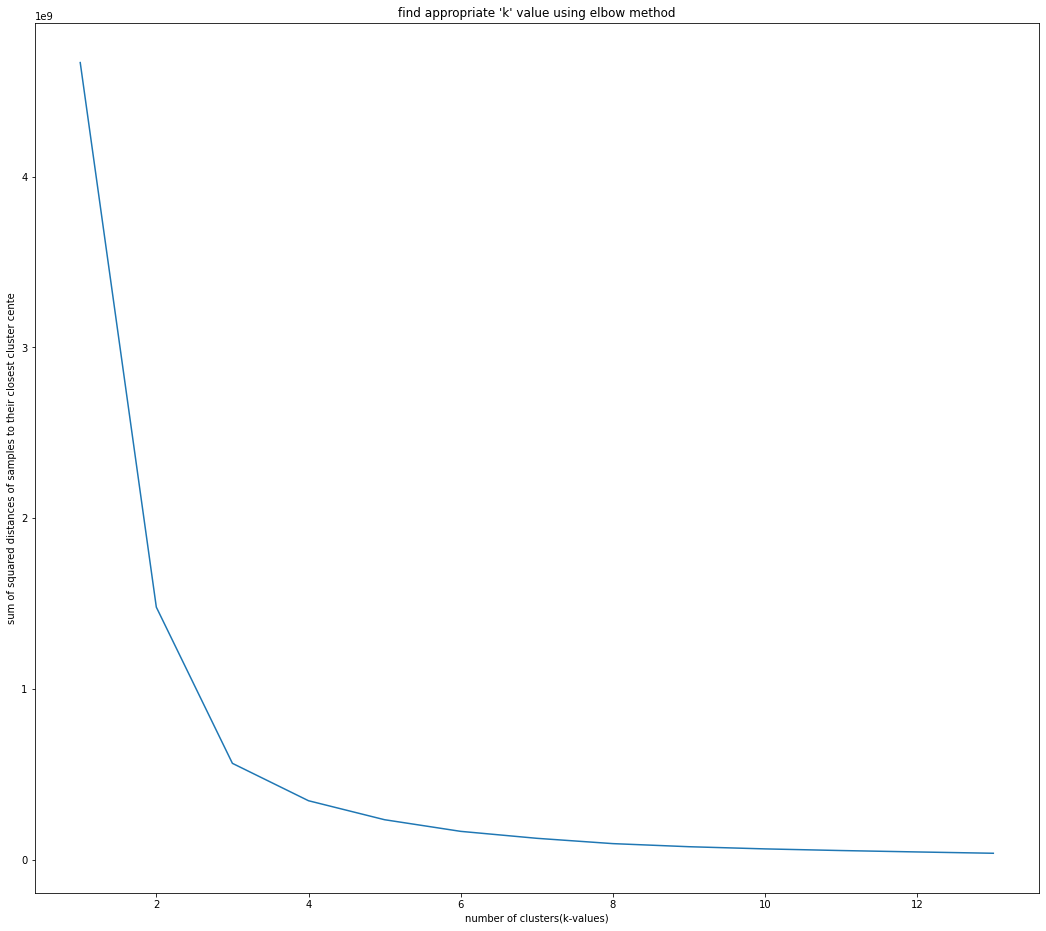

In [ ]:
# set the figure size
plt.figure(figsize=(18, 16))

# generate a range of k valuues
req_k_values = range(1, 14)

#  sum of squared distances of samples to their closest cluster center
sq_distances_in_cluster = []

for k_val in req_k_values:
    # initialize the KMeans and fit it for each value of k
    kmeans = KMeans(n_clusters=k_val)
    kmeans.fit(nyc_zipcode_bp_df)
    # find kmeans.inertia_ (sum of squared distances of samples to their closest cluster center)
    # add them to a list
    sq_distances_in_cluster.append(kmeans.inertia_)

plt.plot(req_k_values, sq_distances_in_cluster)
plt.xlabel('number of clusters(k-values)')
plt.ylabel('sum of squared distances of samples to their closest cluster cente')
plt.title("find appropriate 'k' value using elbow method")
plt.show()

By using the "Elbow method", the best number of clusters(k) value for the newyork zipcode business patterns dataset is '3'. As the elbow occurs at the point 3.